In [1]:
%load_ext autoreload
#To update the imported files

In [2]:
%autoreload
import sys

sys.path.insert(0, '../')
from constants import *
from utilities_RF import *
from utilities import *
pd.set_option('display.max_rows', 50)

In [3]:
selected_features = ['date_forecast',
 'absolute_humidity_2m:gm3',
 'air_density_2m:kgm3',
 'clear_sky_energy_1h:J',
 'clear_sky_rad:W',
 'dew_or_rime:idx',
 'dew_point_2m:K',
 'diffuse_rad:W',
 'diffuse_rad_1h:J',
 'direct_rad_1h:J',
 'effective_cloud_cover:p',
 'elevation:m',
 'fresh_snow_12h:cm',
 'fresh_snow_1h:cm',
 'fresh_snow_24h:cm',
 'fresh_snow_3h:cm',
 'fresh_snow_6h:cm',
 'is_day:idx',
 'is_in_shadow:idx',
 'msl_pressure:hPa',
 'precip_5min:mm',
 'precip_type_5min:idx',
 'pressure_100m:hPa',
 'pressure_50m:hPa',
 'prob_rime:p',
 'rain_water:kgm2',
 'relative_humidity_1000hPa:p',
 'sfc_pressure:hPa',
 'snow_depth:cm',
 'snow_drift:idx',
 'snow_melt_10min:mm',
 'snow_water:kgm2',
 'sun_azimuth:d',
 'sun_elevation:d',
 'super_cooled_liquid_water:kgm2',
 't_1000hPa:K',
 'total_cloud_cover:p',
 'visibility:m',
 'wind_speed_10m:ms',
 'wind_speed_u_10m:ms',
 'wind_speed_v_10m:ms',
 'wind_speed_w_1000hPa:ms']
hyperparameters = {'max_depth': None, 'n_estimators': 100, 'n_jobs' : -1}

In [4]:
rf_a = Random_Forest(hyperparameters, X_observed_a, X_estimated_a, y_a, selected_features)
rf_a.fit()
rf_a.pred()

rf_b = Random_Forest(hyperparameters, X_observed_b, X_estimated_b, y_b, selected_features)
rf_b.fit()
rf_b.pred()

rf_c = Random_Forest(hyperparameters, X_observed_c, X_estimated_c, y_c, selected_features)
rf_c.fit()
rf_c.pred()

/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623

<BarContainer object of 48 artists>

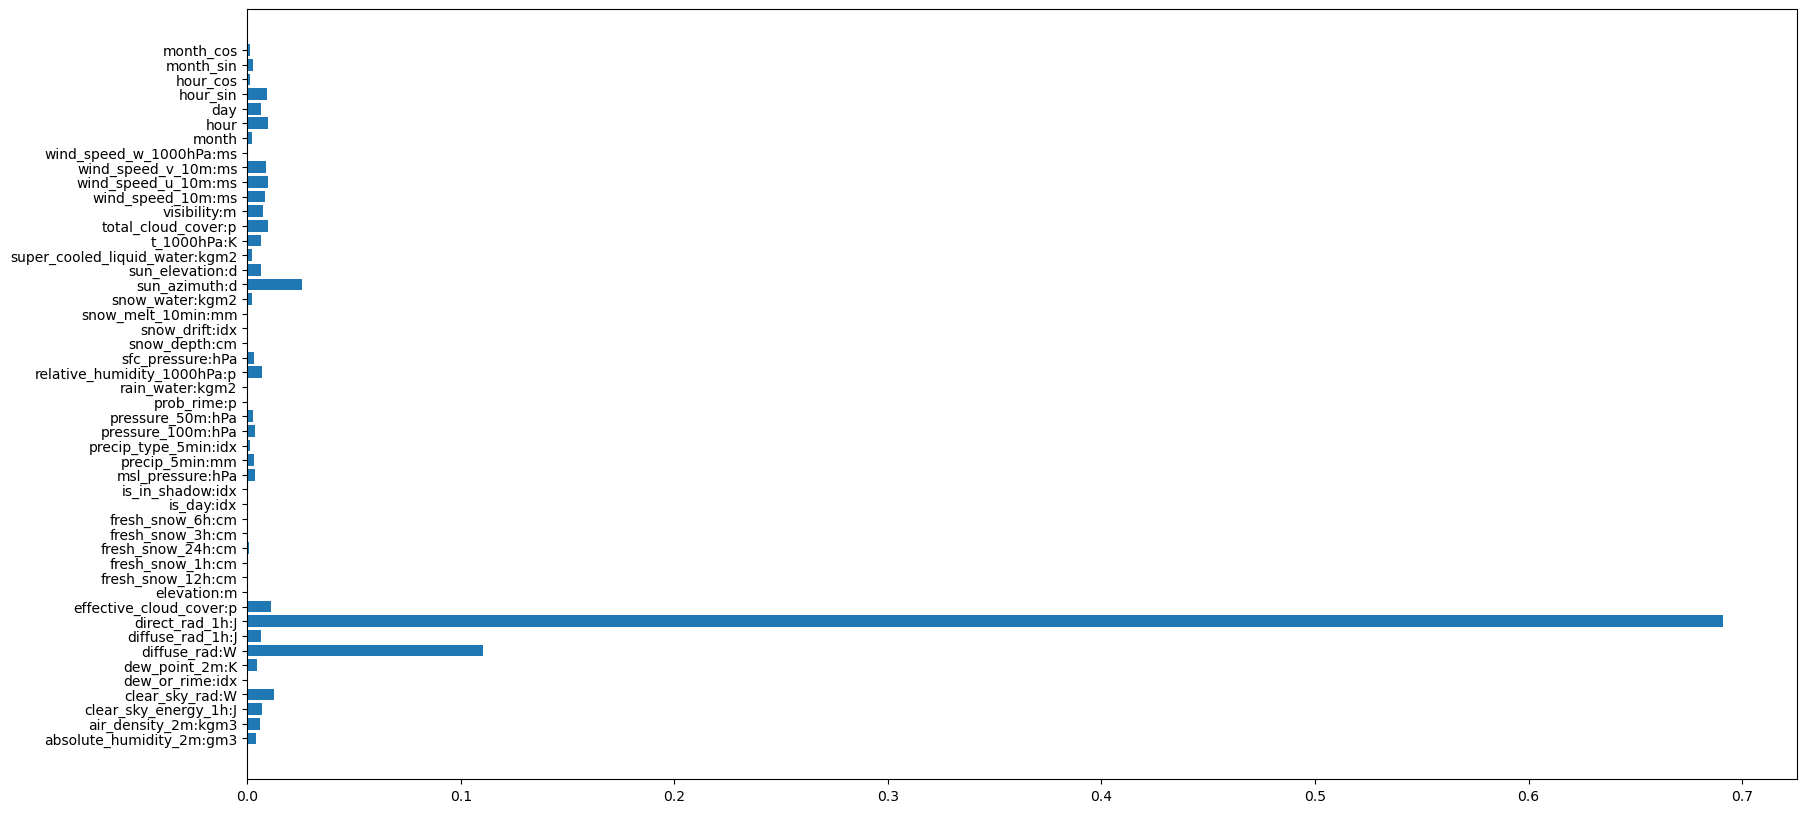

In [5]:
rf_a.model.feature_importances_
plt.figure(figsize=(20,10))
plt.barh(rf_a.X_train.columns, rf_a.model.feature_importances_)

In [6]:
#Evaluate mean asbolute error
mae_a = rf_a.mae()
print("A: Mean Absolute Error:", mae_a)

mae_b = rf_b.mae()
print("B: Mean Absolute Error:", mae_b)

mae_c = rf_c.mae()
print("C: Mean Absolute Error:", mae_c)

A: Mean Absolute Error: 180.41721805107136
B: Mean Absolute Error: 32.19385071118155
C: Mean Absolute Error: 19.91339207566462


In [7]:
rf_a.X_train.shape[0]

30654

In [8]:
corru = correlation(rf_a.X_train, rf_a.y_train)

In [9]:
corru["pv_measurement"].abs().sort_values(ascending=False)

pv_measurement             1.000000
direct_rad_1h:J            0.853004
clear_sky_rad:W            0.811306
clear_sky_energy_1h:J      0.798789
diffuse_rad:W              0.708365
                             ...   
snow_melt_10min:mm         0.011029
day                        0.007153
wind_speed_w_1000hPa:ms    0.005128
elevation:m                     NaN
snow_drift:idx                  NaN
Name: pv_measurement, Length: 51, dtype: float64

In [10]:
#rf_a.X_train['wind_speed_w_1000hPa:ms'].describe()

In [11]:

df = corru
# Compute the correlation matrix
corr_matrix = df

# Create mask for upper triangle of the matrix
mask_upper = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

# Filter out correlations based on the range
strongly_correlated_pairs = corr_matrix.where(
    mask_upper & ((corr_matrix >= 0.6) | (corr_matrix <= -0.6))
).stack()

print(strongly_correlated_pairs)

absolute_humidity_2m:gm3  air_density_2m:kgm3   -0.811861
                          dew_point_2m:K         0.974470
                          t_1000hPa:K            0.907334
                          month_cos             -0.804623
air_density_2m:kgm3       dew_point_2m:K        -0.844875
                                                   ...   
sun_elevation:d           pv_measurement         0.687862
t_1000hPa:K               month_cos             -0.769870
month                     month_sin             -0.764659
hour                      hour_sin              -0.775662
index                     time                   0.999984
Length: 67, dtype: float64


Pearson correlation: 0.94


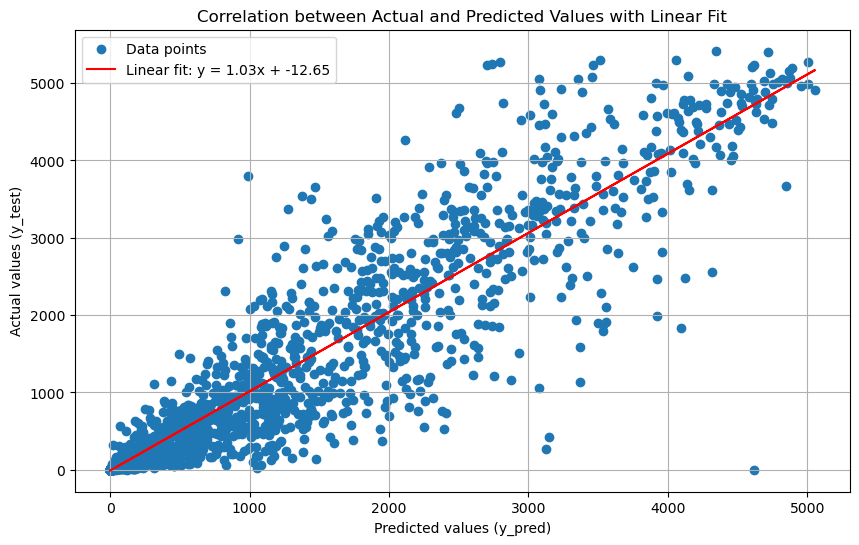

In [12]:
rf_a.corr_plot()

In [13]:
rf_a.pred(X_test_a)
rf_b.pred(X_test_b)
rf_c.pred(X_test_c)

y_pred_rf_test = np.concatenate((rf_a.prediction, rf_b.prediction, rf_c.prediction), axis=0)
y_pred_rf_valid = np.concatenate((rf_a.pred_estimated, rf_b.pred_estimated, rf_c.pred_estimated), axis=0)

/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [14]:
submission("random_forest_not_w_.csv", y_pred_rf_test, "../../")